In [232]:
import networkx as nx 
import dgl
import pickle

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

import matplotlib.pyplot as plt    
# import pylab as plt

In [233]:
def load_graph_data(datafile):
    with open(datafile, "rb") as f:
        data = pickle.load(f)

    g_full = data["g_full"].to_networkx()
    vocab = data["vocab"]
    node_labels = {i: "_".join(vocab[i].split("@@@")[0].split()) for i in range(len(vocab))} # 'trusted platform module@@@21163' -> trusted_platform_module 
    
    return g_full, node_labels

375
208


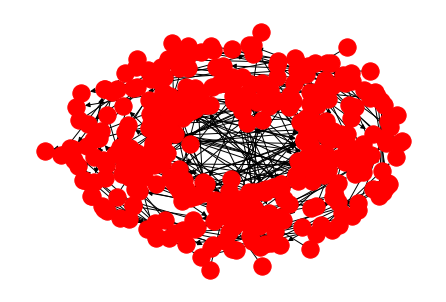

In [5]:
# with open("../insertion_taxo_dmst_0.001_minmax_1000.pkl", "rb") as fin:
#     T = pickle.load(fin)
    
with open("../saved/results/optimal_taxo.pkl", "rb") as fin:
    T = pickle.load(fin)
        
T1 = T.subgraph([18441, 10253, 28690, 2074, 4128, 28705, 24619, 18482, 22585, 4153, 16445, 2114, 14403, 22597, 18502, 12364, 24659, 14422, 2139, 10338, 100, 14446, 22651, 18560, 16518, 22662, 8333, 18574, 20623, 16528, 22676, 24725, 8343, 8345, 16538, 14493, 12453, 8365, 6321, 26812, 4298, 4300, 22733, 2255, 2258, 22739, 216, 10476, 8434, 16632, 20730, 6400, 12545, 26884, 28932, 24839, 8456, 28935, 274, 4370, 6420, 16665, 26913, 6444, 24877, 18736, 12595, 6451, 24890, 24896, 20802, 14661, 29007, 18768, 4441, 16739, 29028, 6502, 2409, 22894, 26990, 22896, 16757, 4475, 22908, 16770, 18833, 10644, 20884, 2467, 24997, 422, 8626, 2483, 10683, 22971, 6595, 22980, 27082, 20951, 25049, 14822, 6636, 23024, 14832, 27126, 29180, 8725, 14873, 21025, 10795, 8748, 18989, 18995, 25146, 10810, 14911, 4679, 12877, 14938, 19040, 23136, 19044, 21097, 21107, 6778, 27262, 19073, 641, 12932, 27272, 4747, 27276, 19086, 25232, 658, 2712, 23201, 27304, 25258, 21163, 12974, 12979, 10931, 10945, 713, 19148, 13004, 725, 10966, 25303, 21207, 25316, 17126, 23275, 21230, 17135, 6896, 21244, 769, 4871, 2840, 21272, 17178, 29475, 17197, 11054, 2862, 25393, 6969, 27453, 17214, 27458, 6982, 19275, 25422, 17233, 6998, 2904, 9056, 29547, 25452, 29550, 19317, 13179, 17277, 9089, 11138, 25477, 908, 29581, 27546, 21403, 25505, 9137, 13242, 29626, 17342, 11205, 23493, 29642, 19404, 17359, 15315, 27608, 991, 11235, 21477, 13292, 27654, 25611, 11281, 5147, 15389, 9248, 19490, 9252, 19498, 15407, 19503, 3131, 7229, 19518, 19523, 21571, 19526, 1103, 11346, 7277, 7285, 21621, 7286, 1146, 11391, 1156, 1157, 23688, 11403, 21643, 1166, 5268, 13464, 1179, 25757, 27809, 23726, 3249, 7350, 9403, 25798, 5324, 1228, 5327, 5338, 13535, 5347, 15594, 27892, 27895, 1280, 1283, 23815, 7431, 17698, 23844, 15653, 23846, 1326, 13620, 25921, 7513, 17761, 13670, 1387, 3442, 15739, 7552, 19841, 19851, 19856, 3479, 23967, 17831, 26023, 15800, 26041, 1465, 21954, 15810, 11720, 28113, 7636, 28123, 15837, 13790, 24029, 28128, 15840, 1508, 28132, 28133, 13801, 9706, 7660, 24045, 19950, 24055, 15866, 26107, 28172, 17945, 9761, 3624, 3628, 11823, 24117, 20023, 5688, 28222, 28246, 18010, 9821, 3680, 13926, 26216, 9844, 7803, 26236, 28285, 18045, 16022, 22167, 20120, 11931, 13983, 3762, 28341, 24251, 5821, 3776, 11972, 14024, 9932, 22223, 20184, 28379, 16097, 3813, 26348, 18165, 22263, 7943, 3847, 3854, 18193, 18203, 5926, 12071, 3878, 28462, 14137, 5946, 28478, 22358, 22380, 16250, 14205, 16275, 1948, 12194, 16299, 1997, 4048, 14302, 24561])
pos = nx.kamada_kawai_layout(T1)
print(len(T1.nodes()))
print(len(T1.edges()))
# nx.draw(T1)
# pos=nx.get_node_attributes(T1,'pos')
nx.draw(T1, pos)
# labels = nx.get_edge_attributes(T1,'weight')
# for l in labels:
#     labels[l] = int(labels[l])
# print(labels)
# nx.draw_networkx_edge_labels(T1,pos,edge_labels=labels)

In [378]:
g_full, node_labels = load_graph_data("../data/MAG_FoS/computer_science.pickle.dep.20200418.bin")

# load optimals

with open("../saved/results/match_scores_taxoexpan_optimal.pkl", "rb") as f:
    full_scores_opt = pickle.load(f)
    
with open("../saved/results/optimal_taxo.pkl", "rb") as f:
    query_taxo_opt = pickle.load(f)

# load model optputs

with open("../saved/results/match_scores_taxoexpan_dmst_0.1_z_10.pkl", "rb") as f:
    full_scores_model = pickle.load(f)

with open("../saved/results/insertion_taxoexpan_dmst_0.1_z_10.pkl", "rb") as f:
    query_taxo_model = pickle.load(f)

In [379]:
def visualize_query_set_taxonomy():
    
    print("optimal query set taxonomy stats:")
    
    isolates = set(nx.isolates(query_taxo_opt))
    connects = list(set(query_taxo_opt.nodes()) - isolates)
    Qopt = query_taxo_opt.subgraph(connects)
    
    print(f"is DAG?: {nx.is_directed_acyclic_graph(Qopt)}")
    print(f"# isolated nodes: {len(isolates)}")
    print(f"# connected nodes: {Qopt.number_of_nodes()}")
    print(f"# edges: {Qopt.number_of_edges()}")
    print(f"# weakly connected components: {nx.number_weakly_connected_components(Qopt)}")
    print()
    
    print("model query set taxonomy stats:")
    
    isolates = set(nx.isolates(query_taxo_model))
    connects = list(set(query_taxo_model.nodes()) - isolates)
    Qmodel = query_taxo_model.subgraph(connects)
    
    print(f"is DAG?: {nx.is_directed_acyclic_graph(Qmodel)}")
    print(f"# isolated nodes: {len(isolates)}")
    print(f"# connected nodes: {Qmodel.number_of_nodes()}")
    print(f"# edges: {Qmodel.number_of_edges()}")
    print(f"# weakly connected components: {nx.number_weakly_connected_components(Qmodel)}")
    print()
    
    print("analysing connections:\n")
    
    for comp in sorted(nx.weakly_connected_components(Qopt), key=len, reverse=True):
        opt_nodes = list(comp)
        opt_labels = {node_id: node_labels[node_id] for node_id in opt_nodes}
        
        print(f"component length: {len(opt_nodes)}")
        print(f"nodes: {opt_labels}")
        
        comp_opt = Qopt.subgraph(opt_nodes).copy()
        opt_edges = comp_opt.edges()
        
        model_nodes = set(opt_nodes)
        model_edges = list()
        model_edge_labels = dict()
        
        for node in opt_nodes:
            edges = Qmodel.edges(node, data="weight")
            for e in edges:
                model_nodes.add(e[0])
                model_nodes.add(e[1])
                model_edges.append((e[0], e[1], {'weight': e[2]}))
#                 model_edge_labels[(e[0], e[1])] = "{:.2f}".format(e[2])
                if (e[0], e[1]) in opt_edges:
                    model_edge_labels[(e[0], e[1])] = "good"
                
        for e in comp_opt.edges():
            if nx.has_path(Qmodel, e[0], e[1]) and not Qmodel.has_edge(e[0], e[1]):
                model_edges.append((e[0], e[1], {'weight': 0.0}))
                model_edge_labels[(e[0], e[1])] = "path"
            
        model_labels = {node_id: node_labels[node_id] for node_id in model_nodes}
        comp_model = nx.DiGraph()
        comp_model.add_nodes_from(model_nodes)
        comp_model.add_edges_from(model_edges)
        
        diff_nodes = list(set(model_nodes) - set(opt_nodes))
        new_opt_nodes = set()
        new_opt_edges = list()
        for node in diff_nodes:
            edges = query_taxo_opt.edges(node)
            new_opt_edges.extend(edges)
            # don't add fully isolated nodes (for clarity)
#             new_opt_nodes.add(node)
#             opt_labels[node] = node_labels[node]
            for e in edges:
                new_opt_nodes.add(e[0])
                new_opt_nodes.add(e[1])
                opt_labels[e[0]] = node_labels[e[0]]
                opt_labels[e[1]] = node_labels[e[1]]
                
        comp_opt.add_nodes_from(new_opt_nodes)
        comp_opt.add_edges_from(new_opt_edges)
        
        plt.figure(1, figsize=(15, 5))
        pos = nx.drawing.nx_agraph.graphviz_layout(comp_opt)
#         pos = nx.spring_layout(comp_opt, seed=8124, k=1)
        nx.draw_networkx(comp_opt, pos, node_size=200, font_size=12, alpha=0.6, labels=opt_labels)
        plt.axis('off')
            
        plt.figure(2, figsize=(15, 5))
        pos = nx.drawing.nx_agraph.graphviz_layout(comp_model)
#         pos = nx.spring_layout(comp_model, seed=8124, k=1)
#         pos = nx.random_layout(comp_model, seed=8124)
        nx.draw_networkx(comp_model, pos, node_size=200, font_size=12, alpha=0.6, labels=model_labels)
        nx.draw_networkx_edge_labels(comp_model, pos, edge_labels=model_edge_labels)
        plt.axis('off')
        
        print("optimal order insertion parent matches (Top-5):\n")
        for node in opt_nodes:
            print(f"{node_labels[node]}:")
            
            parents = full_scores_opt[node][:5]
            sp = ["(Rank: {}, Score: {:.2f}) {}".format(i+1, p[1], node_labels[p[0]]) for i, p in enumerate(parents)]
            sp = '\n'.join(sp)
            print(f"predicted parents:\n{sp}\n")
            
            actuals = [edge[0] for edge in g_full.in_edges(node)]
            sa = []
            for i, p in enumerate(full_scores_opt[node]):
                if p[0] in actuals:
                    sa.append("(Rank: {}, Score: {:.2f}) {}".format(i+1, p[1], node_labels[p[0]]))
            sa = '\n'.join(sa)
            print(f"actual parents:\n{sa}\n")
            
            
        print("model order insertion parent matches (Top-5):\n")
        for node in opt_nodes:
            print(f"{node_labels[node]}:")
            
            parents = full_scores_model[node][:5]
            sp = ["(Rank: {}, Score: {:.2f}) {}".format(i+1, p[1], node_labels[p[0]]) for i, p in enumerate(parents)]
            sp = '\n'.join(sp)
            print(f"predicted parents:\n{sp}\n")
            
            actuals = [edge[0] for edge in g_full.in_edges(node)]
            sa = []
            for i, p in enumerate(full_scores_model[node]):
                if p[0] in actuals:
                    sa.append("(Rank: {}, Score: {:.2f}) {}".format(i+1, p[1], node_labels[p[0]]))
            sa = '\n'.join(sa)
            print(f"actual parents:\n{sa}\n")
        
        break

#     pos = nx.random_layout(Tcomp, seed=8124)
#     pos = nx.spring_layout(Tcomp, seed=8124, k=2)

#     pos = nx.circular_layout(Tdep)
#     pos = nx.kamada_kawai_layout(Tdep)
#     pos = nx.random_layout(Tdep)
#     pos = nx.shell_layout(Tdep)
#     pos = nx.spring_layout(Tdep, seed=4321, k=2)
#     pos = nx.spectral_layout(Tdep)
#     pos = nx.planar_layout(Tdep) # not working
#     pos = nx.spiral_layout(Tdep) # not working
#     pos = nx.rescale_layout(pos[, scale])
#     pos = nx.nx_agraph.graphviz_layout(Tdep)

#     nx.draw(Tdep, pos=nx.drawing.nx_agraph.graphviz_layout(Tdep), node_size=1600, cmap=plt.cm.Blues, node_color=range(len(Tdep)), prog='dot')
#     nx.draw(Tdep, pos)

optimal query set taxonomy stats:
is DAG?: True
# isolated nodes: 2075
# connected nodes: 375
# edges: 208
# weakly connected components: 169

model query set taxonomy stats:
is DAG?: True
# isolated nodes: 158
# connected nodes: 2292
# edges: 2272
# weakly connected components: 20

analysing connections:

component length: 5
nodes: {3878: 'trusted_service_manager', 21163: 'trusted_platform_module', 10476: 'trusted_client', 5324: 'trusted_network_connect', 21621: 'direct_anonymous_attestation'}
optimal order insertion parent matches (Top-5):

trusted_service_manager:
predicted parents:
(Rank: 1, Score: 12.50) extranet
(Rank: 2, Score: 12.24) dnp3
(Rank: 3, Score: 11.63) trusted_platform_module
(Rank: 4, Score: 11.11) trusted_network_connect
(Rank: 5, Score: 10.98) application_service_provider

actual parents:
(Rank: 3, Score: 11.63) trusted_platform_module
(Rank: 4, Score: 11.11) trusted_network_connect
(Rank: 36, Score: 8.09) direct_anonymous_attestation

trusted_platform_module:
pred

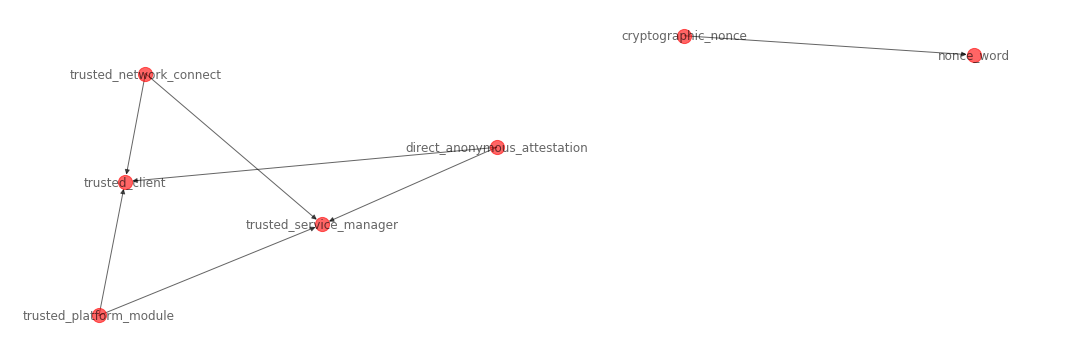

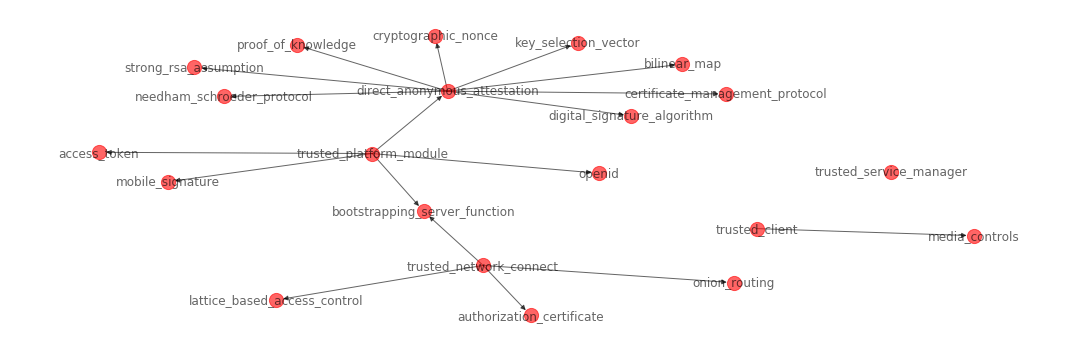

In [380]:
# qualitative analysis

visualize_query_set_taxonomy()